In [1]:
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/challenges-in-representation-learning-facial-expression-recognition-challenge/example_submission.csv
/kaggle/input/challenges-in-representation-learning-facial-expression-recognition-challenge/fer2013.tar.gz
/kaggle/input/challenges-in-representation-learning-facial-expression-recognition-challenge/icml_face_data.csv
/kaggle/input/challenges-in-representation-learning-facial-expression-recognition-challenge/test.csv
/kaggle/input/challenges-in-representation-learning-facial-expression-recognition-challenge/train.csv


In [3]:
data= pd.read_csv('../input/challenges-in-representation-learning-facial-expression-recognition-challenge/train.csv')
data.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28709 entries, 0 to 28708
Data columns (total 2 columns):
emotion    28709 non-null int64
pixels     28709 non-null object
dtypes: int64(1), object(1)
memory usage: 448.7+ KB


In [5]:
data.emotion.value_counts()

3    7215
6    4965
4    4830
2    4097
0    3995
5    3171
1     436
Name: emotion, dtype: int64

In [6]:
num_classes = 7
width = 48
height = 48
emotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
classes=np.array(emotion_labels)

In [7]:
depth = 1
height = int(sqrt(len(data.pixels[0].split()))) 
width = int(height)
print(height, width)

48 48


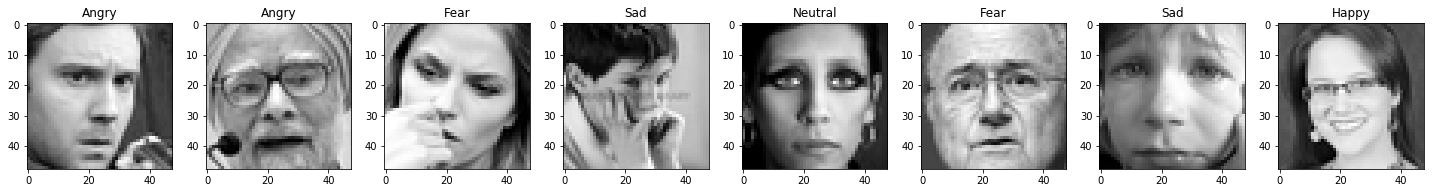

In [8]:
h, w = 10, 10        
nrows, ncols = 1, 8  # array of sub-plots
figsize = [20, 30]     # figure size, inches


# create figure (fig), and array of axes (ax)
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)

# plot simple raster image on each sub-plot
for i, axi in enumerate(ax.flat):
    # i runs from 0 to (nrows*ncols-1)
    # axi is equivalent with ax[rowid][colid]
    img = np.mat(data.pixels[i]).reshape(height, width) 
    axi.imshow(img, cmap = plt.cm.gray)
    # get indices of row/column
    rowid = i // ncols
    colid = i % ncols
    axi.set_title(emotion_labels[data.emotion[i]])

plt.tight_layout(True)
plt.show()